In [1]:
#Every pyCaret model was generated with samplers that didn't crash that performed reasonable.
#the models had pre and post tune_model to evaluate
#Of the 195 models, the top two standout classifiers were tuned

#GradientBoostingClassifier with RandomOverSampler 
# Recall
# 78.37 Baseline
# 17.69 After tune_model
# 95.88 After GridSearch tuning

#LGBM with RandomOverSampler
# Recall
# 78.86 Baseline
# 14.33 After tune_model
# 92.73 After GridSearch tuning

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from imblearn.over_sampling import *
from lightgbm import LGBMClassifier

In [2]:

data3 = pd.read_csv(r"..\binary_optimizer.csv")
#pd.set_option('display.max_rows', None)

In [3]:
#data3[data3.B1 > 140].sort_values('B1', ascending=False)
data3.sort_values('Total',ascending=False).head(2)

,None,Diab,Info,ifier,PrePost,Total,Diab2
78,69.835287,78.371659,Pipeline,model_GradientBoostingClassifier_RandomOverSam...,Pre,148.206946,78.371659
104,69.334668,78.868863,Pipeline,model_LGBMClassifier_RandomOverSampler_auto,Pre,148.203531,78.868863


In [4]:
TARGET = 'diabetes'
ANSWER = 42

In [5]:
data = pd.read_csv("..\diabetes_cleaned.csv")
data.drop(['Unnamed: 0','heart_attack','angina_or_chd','chd_mi'], axis=1, inplace=True)

In [6]:
#display distribution of label records
print(data.diabetes.value_counts())

#convert the solution to binary
data.loc[data.diabetes.isin([2]), "diabetes"] = 1

#display distribution of label records
print(data.diabetes.value_counts())

0.0    254681
2.0     41479
1.0      6793
Name: diabetes, dtype: int64
0.0    254681
1.0     48272
Name: diabetes, dtype: int64


In [7]:
def Sampler(df, target, sampler_name, strategy):
    sampler = globals()[sampler_name](sampling_strategy=strategy)

    under_train_labels = df[target]
    under_train_features = df.drop(columns=target)
    
    X, y = sampler.fit_resample(under_train_features, under_train_labels)
    
    sampled_data = X
    sampled_data[target] = y
    
    print(sampled_data[target].value_counts())
    return sampled_data    

In [8]:
#Random Over Sampler outperformed the other samplers
sampled_data = Sampler(data,TARGET,'RandomOverSampler','auto')

0.0    254681
1.0    254681
Name: diabetes, dtype: int64


In [9]:
#Save off a test dataframe for testing
train_df, test_df = train_test_split(sampled_data, test_size=0.2, random_state=ANSWER, stratify=sampled_data['diabetes'])

In [10]:
test_labels = test_df[TARGET]
test_features = test_df.drop(columns=TARGET)
train_labels = test_df[TARGET]
train_features = test_df.drop(columns=TARGET)


In [11]:
clf = GradientBoostingClassifier()
clf.fit(train_features, train_labels)
predictions = clf.predict(test_features)

In [12]:
confusion_matrix(test_labels, predictions)

array([[35346, 15591],
       [10891, 40045]], dtype=int64)

In [13]:
recall_score(test_labels, predictions)

0.7861826605936862

In [14]:
from sklearn.model_selection import GridSearchCV

In [15]:
#Evaluate Gradient boosting classifier
param_grid = {
    'n_estimators' : [50],
    'learning_rate' : [ 0.1],
    'criterion' : ['friedman_mse'],
    'max_depth' : [16],
    
}
clf = GridSearchCV(GradientBoostingClassifier(), scoring='recall', param_grid=param_grid )
estimator = clf.fit(train_features, train_labels)

predictions = clf.predict(test_features)
print(recall_score(test_labels, predictions), estimator.best_params_)



0.9582024501335009 {'criterion': 'friedman_mse', 'learning_rate': 0.1, 'max_depth': 16, 'n_estimators': 50}


Results</br>
0.7857900109941888 {'criterion': 'friedman_mse', 'learning_rate': 0.1, 'n_estimators': 50}</br>
0.8093686194440082 {'criterion': 'friedman_mse', 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 50}</br>
0.8538165541071148 {'criterion': 'friedman_mse', 'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 50}</br>
0.9572993560546568 {'criterion': 'friedman_mse', 'learning_rate': 0.1, 'max_depth': 16, 'n_estimators': 50}</br>
0.95606250981624 {'criterion': 'friedman_mse', 'learning_rate': 0.09, 'max_depth': 16, 'n_estimators': 50}</br>
0.9529409455002356 {'criterion': 'friedman_mse', 'learning_rate': 0.08, 'max_depth': 16, 'n_estimators': 50}</br>
0.9529409455002356 {'criterion': 'friedman_mse', 'learning_rate': 0.08, 'max_depth': 16, 'n_estimators': 50}</br>
0.9588306894926967 {'criterion': 'friedman_mse', 'learning_rate': 0.1, 'max_depth': 16, 'n_estimators': 50}

In [ ]:
param_grid = {
    'boosting_type' : ['gbdt'],
    'learning_rate'  : [0.1],
    'objective' : ['binary'],
    'num_leaves' : [168],
    'n_estimators': [1195,1200,1205]
}
clf = GridSearchCV(LGBMClassifier(), scoring='recall', param_grid=param_grid )
estimator = clf.fit(train_features, train_labels)

predictions = clf.predict(test_features)
print(recall_score(test_labels, predictions), estimator.best_params_)

Results</br>
0.8006321658551908 {'boosting_type': 'gbdt'}  Default</br>
0.8006321658551908 {'boosting_type': 'gbdt', 'learning_rate': 0.1}</br>
0.8000628239359195 {'boosting_type': 'dart', 'learning_rate': 0.11, 'objective': 'binary'}</br>
0.8071894141667976 {'boosting_type': 'gbdt', 'learning_rate': 0.1, 'n_estimators': 150, 'num_leaves': 40, 'objective': 'binary'}</br>
0.8226009109470709 {'boosting_type': 'gbdt', 'learning_rate': 0.1, 'n_estimators': 200, 'num_leaves': 60, 'objective': 'binary'}</br>
0.8459831945971416 {'boosting_type': 'gbdt', 'learning_rate': 0.1, 'n_estimators': 400, 'num_leaves': 70, 'objective': 'binary'}</br>
0.8779841369561803 {'boosting_type': 'gbdt', 'learning_rate': 0.1, 'n_estimators': 550, 'num_leaves': 110, 'objective': 'binary'}</br>
0.9131655410711481 {'boosting_type': 'gbdt', 'learning_rate': 0.1, 'n_estimators': 900, 'num_leaves': 150, 'objective': 'binary'}</br>
0.9255732684152662 {'boosting_type': 'gbdt', 'learning_rate': 0.1, 'n_estimators': 1200, 'num_leaves': 170, 'objective': 'binary'}</br>
0.9273794565729543 {'boosting_type': 'gbdt', 'learning_rate': 0.1, 'n_estimators': 1200, 'num_leaves': 168, 'objective': 'binary'}</br>


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cm = confusion_matrix(test_labels, predictions)
tp0 = cm[0][0] / (cm[0][0]+cm[0][1])
tp1 = cm[1][1] / (cm[1][0]+cm[1][1])
print(cm,tp0,tp1)


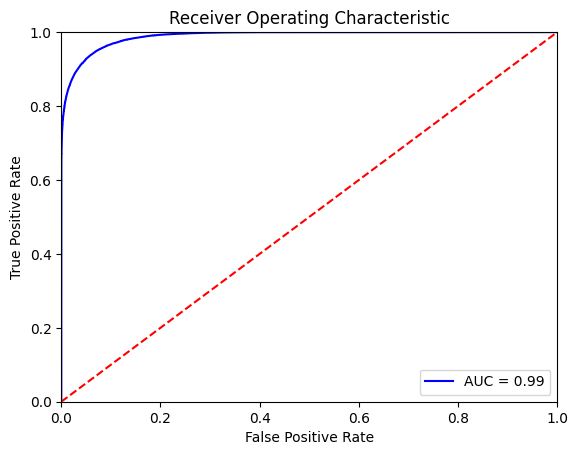

ModuleNotFoundError: No module named 'ggplot'

In [16]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = clf.predict_proba(test_features)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(test_labels, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# method II: ggplot
from ggplot import *
df = pd.DataFrame(dict(fpr = fpr, tpr = tpr))
ggplot(df, aes(x = 'fpr', y = 'tpr')) + geom_line() + geom_abline(linetype = 'dashed')